## Лабораторная работа №5

# **'Графы'**

---



Выполнили: студентки группы ФИТ-211

*   Колесник Полина Олеговна
*   Шабалина Анна Николаевна







# №1

В примере алгоритма поиска в ширину из лекции
(https://cloud.mail.ru/public/9yCy/LitbGAfEg) структура данных граф представлена
словарем. Переделайте этот пример, заменив словарь на реализацию класса Graph из
лекционных материалов.

In [ ]:
#№1

from collections import deque

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self, nbr, weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self, nbr):
        return self.connectedTo[nbr]

class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t, cost=0):
        if f not in self.vertList:
            self.addVertex(f)
        if t not in self.vertList:
            self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

def person_is_seller(name):
    return name[0] == 'K'

def search(name):
    search_queue = deque()
    search_queue += g.getVertex(name).getConnections()
    searched = set()
    while search_queue:
        person = search_queue.popleft()
        if person not in searched:
            if person_is_seller(person.getId()):
                print(person.getId() + " is a mango seller!")
                return True
            else:
                search_queue += person.getConnections()
                searched.add(person)
    return False

g = Graph()
g.addEdge("you", "alice")
g.addEdge("you", "bob")
g.addEdge("you", "claire")
g.addEdge("bob", "anuj")
g.addEdge("bob", "peggy")
g.addEdge("alice", "peggy")
g.addEdge("claire", "thom")
g.addEdge("claire", "jonny")
g.addEdge('thom', 'KRISKA POLINKA')

search("you")

KRISKA POLINKA is a mango seller!


True

# №2

Реализуйте программу, которая по заданному в виде списка смежности графу строит
обращённый граф (тоже в виде списка смежности). Обращённый граф получается
изменением направления всех рёбер исходного графа. Используйте класс Graph из
лекционных материалов.

In [ ]:
class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self, nbr, weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self, nbr):
        return self.connectedTo[nbr]


class Graph:
    def __init__(self):
        self.vertList = {}

        self.numVertices = 0

    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t, cost=0):
        if f not in self.vertList:
            self.addVertex(f)
        if t not in self.vertList:
            self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())


def reverseGraph(graph: Graph):
      r_graph = Graph()
      for vert in graph:
        for neighbor in vert.getConnections():
          r_graph.addEdge(neighbor.getId(), vert.getId())
      return r_graph



g = Graph()

g.addEdge("0", "1")
g.addEdge("0", "2")
g.addEdge("2", "1")
g.addEdge("1", "3")

print("Обращенный граф")

for i in reverseGraph(g):
  for j in i.getConnections():
    print(i.getId(), "->", j.getId())



Обращенный граф
1 -> 0
1 -> 2
2 -> 0
3 -> 1


# 3

Пусть у вас имеется следующий рецепт блинов: одно яйцо, одна чашка блинной смеси, одна
столовая ложка растительного масла и 3/4 чашки молока. Чтобы нажарить блинов, вам
нужно разогреть сковородку, смешать вместе все ингредиенты и выливать смесь по ложке
на горячую сковороду. Когда блин начинает пузыриться, переверните его и дождитесь, пока
нижняя сторона не станет золотистой. Перед тем, как приступить к поеданию блинов,
полейте их сиропом. Весь процесс показан в виде графа.

Напишите программу, которая при помощи поиска в глубину (Depth-first search, DFS)
проведет топологическую сортировку представленного графа и выдаст вариант корректной
последовательности шагов.

Используйте класс Graph из лекционных материалов.

In [ ]:
#№3

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self, nbr, weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id)

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self, nbr):
        return self.connectedTo[nbr]

class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t, cost=0):
        if f not in self.vertList:
            self.addVertex(f)
        if t not in self.vertList:
            self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

def topologicalSort(graph):
    def dfs(vertex, visited, stack):
        visited.add(vertex)
        for neighbor in vertex.getConnections():
            if neighbor not in visited:
                dfs(neighbor, visited, stack)
        stack.insert(0, vertex)

    visited = set()
    stack = []
    for vertex in graph:
        if vertex not in visited:
            dfs(vertex, visited, stack)

    return stack

g = Graph()


g.addEdge('heat syrup', 'eat')
g.addEdge('turn when bubbly', 'eat')

g.addEdge('1 cup mix', 'heat syrup')

g.addEdge('pour 1/4 cup', 'turn when bubbly')

g.addEdge('1 cup mix', 'pour 1/4 cup')
g.addEdge('heat griddle', 'pour 1/4 cup')

g.addEdge('3/4 cup milk', '1 cup mix')
g.addEdge('1 egg', '1 cup mix')
g.addEdge('1 oil', '1 cup mix')


sorted_steps = topologicalSort(g)
for step in sorted_steps:
    print(step)

1 oil
1 egg
3/4 cup milk
heat griddle
1 cup mix
pour 1/4 cup
turn when bubbly
heat syrup
eat


# №4

У вас имеется список городов и набор автобусных маршрутов между ними. Маршруты
однонаправленные, т.е. маршрут вида «город А – город Б» означает, что можно поехать из
города А в город Б, а обратного проезда нет.

Пользователь вводит два города. Ваша программа должна определить минимальный по
количеству километров возможный путь от первого до второго города, или сообщение, что
пути между городами нет. Нужно вывести как количество километров, так и получившейся
путь.

Для решения задачи используйте алгоритм Дейкстры и класс Graph из лекционных
материалов. Список городов и маршрутов возьмите согласно вашему варианту. Расстояние
между городами найдите в интернете самостоятельно.

Также необходимо нарисовать граф вашего варианта (например, здесь
https://graphonline.ru/) и приложить его в ваш отчет.

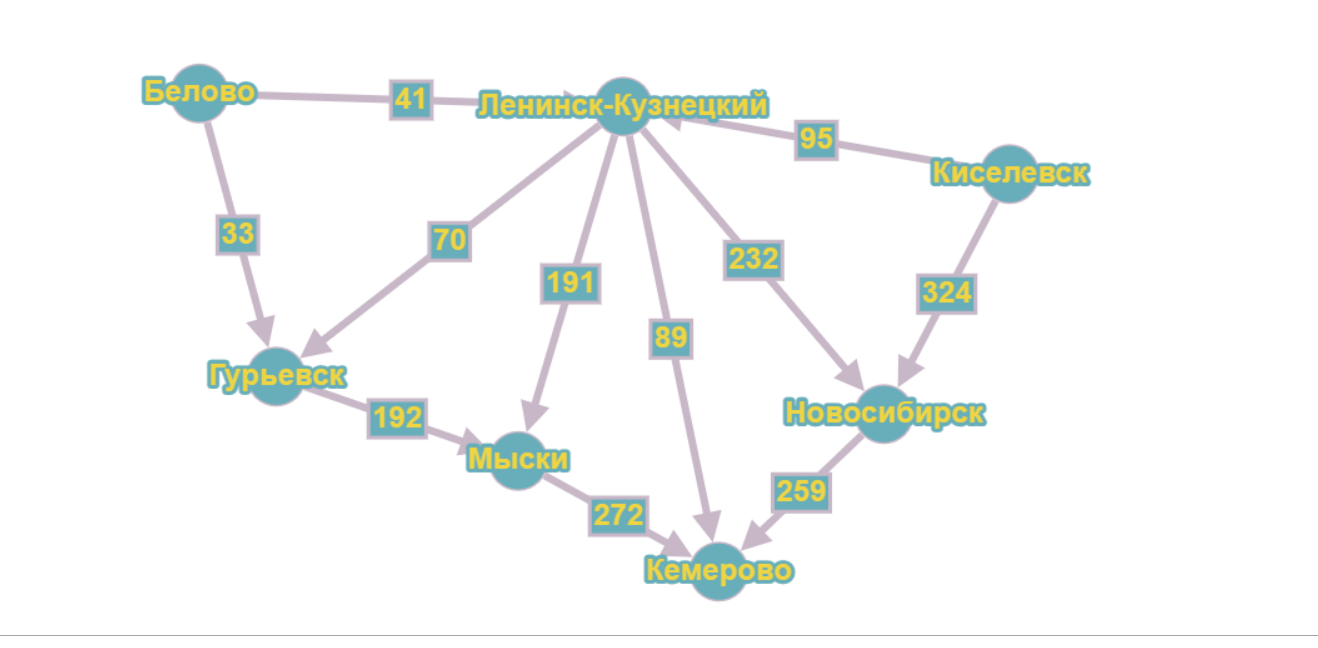

In [5]:
import sys

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self, nbr, weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self, nbr):
        return self.connectedTo[nbr]


class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t, cost=0):
        if f not in self.vertList:
            self.addVertex(f)
        if t not in self.vertList:
            self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

def dijkstra(graph: Graph, start_node: Vertex):
    unvisited_nodes = list(graph.getVertices())

    shortest_path = {}
    prev_nodes = {}

    max_value = sys.maxsize

    for node in unvisited_nodes:
        shortest_path[node] = max_value
    shortest_path[start_node.getId()] = 0

    while unvisited_nodes:
        current_min_node = None

        for node in unvisited_nodes:

            if current_min_node == None:
                current_min_node = node

            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node

        neighbors = []

        for neighbor in graph.getVertex(current_min_node).getConnections():
            neighbors.append(neighbor.getId())

        for neighbor in neighbors:
            nbr = graph.getVertex(neighbor)

            tentative_value = shortest_path[current_min_node] + graph.getVertex(current_min_node).getWeight(nbr)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                prev_nodes[neighbor] = current_min_node
        unvisited_nodes.remove(current_min_node)
    return prev_nodes, shortest_path


def print_result(prev_nodes, shortest_path, start_node, end_node):
    path = []
    node = end_node
    while node != start_node:
        path.append(node)
        try:
            node = prev_nodes[node]
        except KeyError:
            print("Нет подходящего маршрута")
            return

    path.append(start_node)
        # print(path)
    path.reverse()
    print("Лучший маршрут:", end=" ")
    print(" -> ".join(path))
    print("Расстояние:", shortest_path[end_node])


g = Graph()

g.addEdge("Белово", "Ленинск-Кузнецкий", 41)
g.addEdge("Белово", "Гурьевск", 33)
g.addEdge("Ленинск-Кузнецкий", "Гурьевск", 70)
g.addEdge("Ленинск-Кузнецкий", "Мыски", 191)
g.addEdge("Ленинск-Кузнецкий", "Кемерово", 89)
g.addEdge("Ленинск-Кузнецкий", "Новосибирск", 232)
g.addEdge("Киселевск", "Ленинск-Кузнецкий", 95)
g.addEdge("Киселевск", "Новосибирск", 324)
g.addEdge("Гурьевск", "Мыски", 192)
g.addEdge("Мыски", "Кемерово", 272)
g.addEdge("Новосибирск", "Кемерово", 259)

startNode = g.getVertex(str(input()))
endNode = g.getVertex(str(  input()))

prev_nodes, shortest_path = dijkstra(g, startNode)
print_result(prev_nodes, shortest_path, startNode.getId(), endNode.getId())


Белово
Мыски
Лучший маршрут: Белово -> Гурьевск -> Мыски
Расстояние: 225
